In [1]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# Collecte des données
data = [
    {'nom': 'Spaghetti bolognaise', 'type': 'plat', 'viande': 'boeuf', 'apport_calorique': 500, 'epicee': False},
    {'nom': 'Tarte aux pommes', 'type': 'dessert', 'viande': 'vegetarien', 'apport_calorique': 300, 'epicee': False},
    {'nom': 'Poulet tandoori', 'type': 'plat', 'viande': 'poulet', 'apport_calorique': 600, 'epicee': True},
    {'nom': 'Salade de quinoa', 'type': 'entree', 'viande': 'vegetarien', 'apport_calorique': 400, 'epicee': False},
    {'nom': 'Saumon grille', 'type': 'plat', 'viande': 'poisson', 'apport_calorique': 450, 'epicee': False},
]

# Prétraitement des données
df = pd.DataFrame(data)
df = pd.get_dummies(df, columns=['type', 'viande', 'epicee'])

In [ ]:
df1 = pd.read_csv("C:\Users\Ulysse\Workspace\pipo-resto\Talend project\Cookteau_Ingredients.csv")
df2 = pd.read_csv("C:\Users\Ulysse\Workspace\pipo-resto\Talend project\Cookteau_Ingredients____.csv", sep=";")

In [50]:
import json

with open('recipes_data.json') as f:  
    data = json.load(f)



In [51]:
data["1"]

[362, 291, 426]

In [31]:
data

{'1': '362,291,426',
 '2': '61,332,258,2001,317,392,362,373,426',
 '3': '376,992,258,2001,317,299,426,341',
 '4': '60,327,411,992,330,331,254,932,332,373,212,426,364,341',
 '5': '385,240,426',
 '6': '254,332,262,317,362,373,426,341',
 '7': '376,992,417,257,258,317,392,341',
 '8': '323,376,992,258,190,317,392,426,341',
 '9': '992,254,257,190,392,426,341',
 '10': '61,262',
 '11': '190,262',
 '12': '376,992,417,2002,190,317,426,341',
 '13': '376,61,417,385,258,190,317,362,426',
 '14': '376,305,992,254,317,403,426,341',
 '15': '61,262,339,394,212',
 '16': '992,254,258,348,373,426,364,341',
 '17': '376,61,992,254,257,258,317,392,347,426,341',
 '18': '376,61,332,257,258,317,392,426',
 '19': '376,61,992,780,332,257,258,2000,2001,190,317,392,426,341',
 '20': '376,404,327,992,332,257,258,2000,87,2001,317,392,341',
 '21': '376,61,992,332,257,258,317,392,426,341',
 '22': '61,326,327,992,330,331,332,257,258,317,392,362,426,341',
 '23': '61,67,332,257,258,259,317,392,362,341',
 '24': '284,457,417,3

In [22]:
RECIPES_COUNT = 45772 

def calculate_scores(recipes, save=True):
    scores = {} # {ID_recipe : {id_recipe : distance }}
    for i in range(1, RECIPES_COUNT):
        scores[str(i)] = []
        for j in range(1, RECIPES_COUNT):
            scores[str(i)].append(euclidian_distance(recipes[str(i)], recipes[str(j)]))

    return scores

def euclidian_distance(vecA, vecB):
    distance = 0
    for a, b in zip(vecA, vecB):
        distance += abs(int(a)-int(b))
    
    return distance

In [23]:
a = calculate_scores(data)

ValueError: invalid literal for int() with base 10: ','

In [24]:
data

{'1': '362,291,426',
 '2': '61,332,258,2001,317,392,362,373,426',
 '3': '376,992,258,2001,317,299,426,341',
 '4': '60,327,411,992,330,331,254,932,332,373,212,426,364,341',
 '5': '385,240,426',
 '6': '254,332,262,317,362,373,426,341',
 '7': '376,992,417,257,258,317,392,341',
 '8': '323,376,992,258,190,317,392,426,341',
 '9': '992,254,257,190,392,426,341',
 '10': '61,262',
 '11': '190,262',
 '12': '376,992,417,2002,190,317,426,341',
 '13': '376,61,417,385,258,190,317,362,426',
 '14': '376,305,992,254,317,403,426,341',
 '15': '61,262,339,394,212',
 '16': '992,254,258,348,373,426,364,341',
 '17': '376,61,992,254,257,258,317,392,347,426,341',
 '18': '376,61,332,257,258,317,392,426',
 '19': '376,61,992,780,332,257,258,2000,2001,190,317,392,426,341',
 '20': '376,404,327,992,332,257,258,2000,87,2001,317,392,341',
 '21': '376,61,992,332,257,258,317,392,426,341',
 '22': '61,326,327,992,330,331,332,257,258,317,392,362,426,341',
 '23': '61,67,332,257,258,259,317,392,362,341',
 '24': '284,457,417,3

In [ ]:
recipe_ids = [61, 332, 258, 2001, 317, 392, 362, 373, 426]

# Obtenir l'ID maximum parmi les recettes
max_recipe_id = max(recipe_ids)

# Créer un dictionnaire vide pour stocker les vecteurs
recipe_vectors = {}

# Créer les vecteurs pour chaque recette
for recipe_id in recipe_ids:
    vector = [0] * (max_recipe_id + 1)
    vector[recipe_id] = 1
    recipe_vectors[recipe_id] = vector

# Afficher les vecteurs des recettes
for recipe_id, vector in recipe_vectors.items():
    print(f"Recette {recipe_id}: {vector}")

In [37]:
INGREDIENTS_COUNT = 2102

def binarise_recipes(recipes, save=True):
    recipes_binarized = {}
    for i in range(RECIPES_COUNT):
        recipes_binarized[str(i)] = [0] * (INGREDIENTS_COUNT + 1)

    for i in range(1,RECIPES_COUNT):
        for id in recipes[str(i)]:
            recipes_binarized[str(i)][int(id)] = 1

    if save:
        # Écrire les données dans un fichier JSON
        with open("Data/applications/knn_recommendation/user_vector1.json", "w") as f:
            json.dump(recipes_binarized, f, indent=4)
    
    return recipes_binarized

In [38]:
b = binarise_recipes(data, False)

ValueError: invalid literal for int() with base 10: ','

In [52]:
recipes_binarized = {}
for i in range(RECIPES_COUNT):
    recipes_binarized[str(i)] = [0] * (INGREDIENTS_COUNT + 1)


In [55]:
for i in range(1,RECIPES_COUNT):
    if str(i) in data:
        for id in data[str(i)]:
            recipes_binarized[str(i)][int(id)] = 1

In [59]:
recipes_binarized["1"][362]

1

In [46]:
data

{'1': '362,291,426',
 '2': '61,332,258,2001,317,392,362,373,426',
 '3': '376,992,258,2001,317,299,426,341',
 '4': '60,327,411,992,330,331,254,932,332,373,212,426,364,341',
 '5': '385,240,426',
 '6': '254,332,262,317,362,373,426,341',
 '7': '376,992,417,257,258,317,392,341',
 '8': '323,376,992,258,190,317,392,426,341',
 '9': '992,254,257,190,392,426,341',
 '10': '61,262',
 '11': '190,262',
 '12': '376,992,417,2002,190,317,426,341',
 '13': '376,61,417,385,258,190,317,362,426',
 '14': '376,305,992,254,317,403,426,341',
 '15': '61,262,339,394,212',
 '16': '992,254,258,348,373,426,364,341',
 '17': '376,61,992,254,257,258,317,392,347,426,341',
 '18': '376,61,332,257,258,317,392,426',
 '19': '376,61,992,780,332,257,258,2000,2001,190,317,392,426,341',
 '20': '376,404,327,992,332,257,258,2000,87,2001,317,392,341',
 '21': '376,61,992,332,257,258,317,392,426,341',
 '22': '61,326,327,992,330,331,332,257,258,317,392,362,426,341',
 '23': '61,67,332,257,258,259,317,392,362,341',
 '24': '284,457,417,3

In [8]:
import random

a = {"1":1,"2":2,"3":3,"4":4,"5":5,"6":6,"7":7,"8":8,"9":9,"10":10}

kmins
for id in a:


{'1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, '10': 10}
1
2
3
4
5
6
7
8
9
10


In [7]:
import json 
data = {"1": [1, 2, 3],
 "2": [4, 5], 
 "3": [3, 4, 6], 
 "4": [6], 
 "5": [1],
 "7": [5]
}

RECIPES_COUNT = 7
INGREDIENTS_COUNT = 6


def binarize_recipes(recipes_dic, save=True):
    recipes_binarized = {}
    for i in range(1, RECIPES_COUNT +1):
        recipes_binarized[str(i)] = [0] * (INGREDIENTS_COUNT + 1)
    print(recipes_binarized)

    for i in range(1,RECIPES_COUNT +1):
        print(f"id {i} ")
        if str(i) in recipes_dic:
            for id in recipes_dic[str(i)]:
                recipes_binarized[str(i)][int(id)] = 1

    if save:
        # Écrire les données dans un fichier JSON
        with open("test_b.json", "w") as f:
            json.dump(recipes_binarized, f)
    
    return recipes_binarized

In [8]:
binarized = binarize_recipes(data)
print(binarized)

{'1': [0, 0, 0, 0, 0, 0, 0], '2': [0, 0, 0, 0, 0, 0, 0], '3': [0, 0, 0, 0, 0, 0, 0], '4': [0, 0, 0, 0, 0, 0, 0], '5': [0, 0, 0, 0, 0, 0, 0], '6': [0, 0, 0, 0, 0, 0, 0], '7': [0, 0, 0, 0, 0, 0, 0]}
id 1 
id 2 
id 3 
id 4 
id 5 
id 6 
id 7 
{'1': [0, 1, 1, 1, 0, 0, 0], '2': [0, 0, 0, 0, 1, 1, 0], '3': [0, 0, 0, 1, 1, 0, 1], '4': [0, 0, 0, 0, 0, 0, 1], '5': [0, 1, 0, 0, 0, 0, 0], '6': [0, 0, 0, 0, 0, 0, 0], '7': [0, 0, 0, 0, 0, 1, 0]}


In [46]:
def calculate_scores(recipes_binarized, save=True):
    scores = {} # {ID_recipe : {id_recipe : distance }}
    for id in recipes_binarized:
        scores[id] = {}
        for i in range(1, RECIPES_COUNT + 1):
            scores[id][str(i)] = euclidian_distance(recipes_binarized[id], recipes_binarized[str(i)])
            

    if save:
        # Écrire les données dans un fichier JSON
        with open("scores.json", "w") as f:
            json.dump(scores, f)

    return scores


def euclidian_distance(vecA, vecB):
    distance = 0
    for a, b in zip(vecA, vecB):
        distance += abs(a-b)
    
    return distance

In [47]:
calculate_scores(binarized)

{'1': {'1': 0, '2': 5, '3': 4, '4': 4, '5': 2, '6': 1, '7': 4},
 '2': {'1': 5, '2': 0, '3': 3, '4': 3, '5': 3, '6': 4, '7': 1},
 '3': {'1': 4, '2': 3, '3': 0, '4': 2, '5': 4, '6': 5, '7': 4},
 '4': {'1': 4, '2': 3, '3': 2, '4': 0, '5': 2, '6': 3, '7': 2},
 '5': {'1': 2, '2': 3, '3': 4, '4': 2, '5': 0, '6': 1, '7': 2},
 '6': {'1': 1, '2': 4, '3': 5, '4': 3, '5': 1, '6': 0, '7': 3},
 '7': {'1': 4, '2': 1, '3': 4, '4': 2, '5': 2, '6': 3, '7': 0}}

In [10]:
data = {"1": [1, 2, 3],
 "2": [4, 5], 
 "3": [3, 4, 6], 
 "4": [6], 
 "5": [1],
 "7": [5]
}

binarized = binarize_recipes(data)

{'1': [0, 0, 0, 0, 0, 0, 0], '2': [0, 0, 0, 0, 0, 0, 0], '3': [0, 0, 0, 0, 0, 0, 0], '4': [0, 0, 0, 0, 0, 0, 0], '5': [0, 0, 0, 0, 0, 0, 0], '6': [0, 0, 0, 0, 0, 0, 0], '7': [0, 0, 0, 0, 0, 0, 0]}
id 1 
id 2 
id 3 
id 4 
id 5 
id 6 
id 7 


In [11]:
binarized

{'1': [0, 1, 1, 1, 0, 0, 0],
 '2': [0, 0, 0, 0, 1, 1, 0],
 '3': [0, 0, 0, 1, 1, 0, 1],
 '4': [0, 0, 0, 0, 0, 0, 1],
 '5': [0, 1, 0, 0, 0, 0, 0],
 '6': [0, 0, 0, 0, 0, 0, 0],
 '7': [0, 0, 0, 0, 0, 1, 0]}

In [70]:
def calculate_scores(recipes_binarized, save=True):
    scores = {i: {j: 0 for j in recipes_binarized} for i in recipes_binarized} # {ID_recipe : {id_recipe : distance }}

    for id in recipes_binarized:
        if id != str(1):
            for i in recipes_binarized:
                scores[id][i] = sum(abs(a - b) for a, b in zip(recipes_binarized[id], recipes_binarized[i]))
                scores[i][id] = scores[id][i]
                if (int(i)+1)  == int(id): # diagonale
                    break
    
    if save:
        # Écrire les données dans un fichier JSON
        with open("scores.json", "w") as f:
            json.dump(scores, f)

    return scores

In [71]:
calculate_scores(binarized)

{'1': {'1': 0, '2': 5, '3': 4, '4': 4, '5': 2, '6': 3, '7': 4},
 '2': {'1': 5, '2': 0, '3': 3, '4': 3, '5': 3, '6': 2, '7': 1},
 '3': {'1': 4, '2': 3, '3': 0, '4': 2, '5': 4, '6': 3, '7': 4},
 '4': {'1': 4, '2': 3, '3': 2, '4': 0, '5': 2, '6': 1, '7': 2},
 '5': {'1': 2, '2': 3, '3': 4, '4': 2, '5': 0, '6': 1, '7': 2},
 '6': {'1': 3, '2': 2, '3': 3, '4': 1, '5': 1, '6': 0, '7': 1},
 '7': {'1': 4, '2': 1, '3': 4, '4': 2, '5': 2, '6': 1, '7': 0}}

In [ ]:
def binarize_recipes(recipes_dic, save=True):
    recipes_binarized = {}
    for i in recipes_dic:
        recipes_binarized[str(i)] = [0] * (INGREDIENTS_COUNT + 1)

    for i in range(1,RECIPES_COUNT +1):
        print(f"id {i} ")
        if i in recipes_dic:
            for id in recipes_dic[str(i)]:
                recipes_binarized[str(i)][int(id)] = 1
    print()
    if save:
        # Écrire les données dans un fichier JSON
        with open("test_b.json", "w") as f:
            json.dump(recipes_binarized, f)
    
    return recipes_binarized

In [82]:
def compute_nearest_neighbors(user_similarity, k, save=True):
    nearest_neighbors = {}
    for i in user_similarity:
        sorted_similarity = sorted(user_similarity[str(i)].items(), key=lambda x: x[1])
        nearest_neighbors[str(i)] = {"nearest_N": [int(j[0]) for j in sorted_similarity[1:k+1]]}

    if save:
        # Écrire les données dans un fichier JSON
        with open("Data/applications/knn_recommendation/user_nn.json", "w") as f:
            json.dump(nearest_neighbors, f, indent=4)

    return nearest_neighbors

data = {
        '1': {'1': 0, '2': 5, '3': 4, '4': 4, '5': 2, '7': 4},
        '2': {'1': 5, '2': 0, '3': 3, '4': 3, '5': 3, '7': 1},
        '3': {'1': 4, '2': 3, '3': 0, '4': 2, '5': 4, '7': 4},
        '4': {'1': 4, '2': 3, '3': 2, '4': 0, '5': 2, '7': 2},
        '5': {'1': 2, '2': 3, '3': 4, '4': 2, '5': 0, '7': 2},
        '7': {'1': 4, '2': 1, '3': 4, '4': 2, '5': 2, '7': 0}
    }

In [83]:
print(compute_nearest_neighbors(data, 3, False))

{'1': {'nearest_N': [5, 3, 4]}, '2': {'nearest_N': [7, 3, 4]}, '3': {'nearest_N': [4, 2, 1]}, '4': {'nearest_N': [3, 5, 7]}, '5': {'nearest_N': [1, 4, 7]}, '7': {'nearest_N': [2, 4, 5]}}


In [84]:
a = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

print(len(a))


49


In [85]:
b = [0, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 246, 247, 270, 271, 272, 274, 275, 276, 277, 278, 279, 280, 284, 285, 286, 288, 289, 290, 342, 343, 344, 345, 346, 347, 348, 349, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 377, 378, 379, 382, 384, 386, 387, 396, 397, 401, 403, 409, 412, 417, 427, 428, 429, 437, 438, 455, 456, 457, 458, 465, 472, 475, 476, 478, 489, 495, 498, 499, 500, 501, 502, 503, 504, 506, 507, 509, 510, 511, 512, 513, 514, 515, 516, 519, 520, 521, 522, 524, 528, 531, 532, 536, 537, 538, 539, 541, 543, 544, 545, 546, 547, 549, 550, 551, 552, 553, 554, 556, 558, 560, 562, 563, 565, 566, 567, 568, 569, 570, 571, 573, 576, 577, 579, 580, 581, 583, 587, 588, 589, 590, 591, 592, 593, 594, 596, 597, 600, 601, 602, 603, 604, 607, 608, 614, 615, 617, 618, 619, 620, 624, 625, 626, 627, 628, 629, 630, 631, 634, 635, 636, 637, 638, 639, 640, 641, 643, 644, 645, 646, 647, 648, 651, 652, 653, 654, 655, 656, 657, 659, 661, 662, 663, 664, 665, 667, 668, 669, 672, 673, 674, 676, 677, 678, 679, 680, 682, 683, 684, 685, 686, 687, 688, 690, 691, 693, 694, 695, 698, 699, 700, 703, 704, 705, 706, 707, 709, 710, 711, 713, 715, 716, 719, 720, 721, 722, 723, 724, 725, 726, 727, 728, 729, 730, 731, 732, 733, 734, 735, 736, 737, 738, 739, 743, 744, 745, 746, 748, 749, 750, 751, 752, 753, 755, 756, 757, 758, 782, 783, 799, 825, 826, 829, 843, 856, 870, 882, 950, 968, 969, 977, 978, 987, 988, 989, 990, 991, 993, 995, 1032, 1036, 1053, 1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076, 1077, 1079, 1081, 1082, 1088, 1089, 1090, 1091, 1094, 1095, 1096, 1097, 1098, 1099, 1100, 1101, 1102]

In [88]:
print(b[49])

348


In [89]:
b[48]

347

In [90]:
b[50]

349

In [12]:
RECIPES_COUNT = 45772
INGREDIENTS_COUNT = 1105


def compute_one_knn(recipe_id, recipes_binarized, save=False, file_name="scores.json"):
    scores = {}
    scores[recipe_id] = {}
    for i in recipes_binarized:
        scores[recipe_id][i] = sum(
            abs(a - b)
            for a, b in zip(recipes_binarized[recipe_id], recipes_binarized[i])
        )

    if save:
        # Écrire les données dans un fichier JSON
        with open(f"data/{file_name}", "w") as f:
            json.dump(scores, f)

    return scores

def binarize_recipes(
    recipes_dic,
    recipes_count=RECIPES_COUNT,
    ingredients_count=INGREDIENTS_COUNT,
    save=True,
):
    recipes_binarized = {}
    for i in recipes_dic:
        recipes_binarized[str(i)] = [0] * (ingredients_count)
    for i in range(1, recipes_count + 1):
        if str(i) in recipes_dic:
            for id in recipes_dic[str(i)]:
                recipes_binarized[str(i)][int(id) - 1] = 1
    if save:
        # Écrire les données dans un fichier JSON
        with open("data/recipes_binarized.json", "w") as f:
            json.dump(recipes_binarized, f)

    return recipes_binarized

In [10]:
import json
with open("data/recipes_data.json") as f:
    recipes_data = json.load(f)


recipes_data

{'1': [362, 291, 426],
 '2': [61, 332, 258, 1004, 317, 392, 362, 373, 426],
 '3': [376, 992, 258, 1004, 317, 299, 426, 341],
 '4': [60, 327, 411, 992, 330, 331, 254, 932, 332, 373, 212, 426, 364, 341],
 '5': [385, 240, 426],
 '6': [254, 332, 262, 317, 362, 373, 426, 341],
 '7': [376, 992, 417, 257, 258, 317, 392, 341],
 '8': [323, 376, 992, 258, 190, 317, 392, 426, 341],
 '9': [992, 254, 257, 190, 392, 426, 341],
 '10': [61, 262],
 '11': [190, 262],
 '12': [376, 992, 417, 1005, 190, 317, 426, 341],
 '13': [376, 61, 417, 385, 258, 190, 317, 362, 426],
 '14': [376, 305, 992, 254, 317, 403, 426, 341],
 '15': [61, 262, 339, 394, 212],
 '16': [992, 254, 258, 348, 373, 426, 364, 341],
 '17': [376, 61, 992, 254, 257, 258, 317, 392, 347, 426, 341],
 '18': [376, 61, 332, 257, 258, 317, 392, 426],
 '19': [376, 61, 992, 780, 332, 257, 258, 1003, 1004, 190, 317, 392, 426, 341],
 '20': [376, 404, 327, 992, 332, 257, 258, 1003, 87, 1004, 317, 392, 341],
 '21': [376, 61, 992, 332, 257, 258, 317, 392,

In [13]:
recipes_binarized = binarize_recipes(recipes_data)

In [60]:
scores = compute_one_knn("23965", recipes_binarized, 5)

In [31]:
def compute_nearest_neighbors(user_similarity, k, save=True):
    nearest_neighbors = {}
    for i in user_similarity:
        sorted_similarity = sorted(user_similarity[str(i)].items(), key=lambda x: x[1])
        nearest_neighbors[str(i)] = {
            "nearest_N": [int(j[0]) for j in sorted_similarity[1 : k + 1]]
        }

    if save:
        # Écrire les données dans un fichier JSON
        with open("data/kNN_computed.json", "w") as f:
            json.dump(nearest_neighbors, f, indent=4)

    return nearest_neighbors

In [63]:
knn = compute_nearest_neighbors(scores, 5, False)

In [64]:
knn

{'23965': {'nearest_N': [39919, 11013, 11066, 11331, 23344]}}

In [50]:
import mysql.connector
import json

from Data.BD.config import config

def get_recipes_from_id(recipe_id, knn):
    # Créer une connexion à la base de données MySQL
    cnx = mysql.connector.connect(**config)

    # Créer un curseur pour exécuter les requêtes SQL
    cursor = cnx.cursor()

    recipe_ids = knn[str(recipe_id)]["nearest_N"]

    where_clause = " OR ".join(["r.recipe_id = %s"] * len(recipe_ids))
    query = """
    SELECT DISTINCT r.recipe_id, r.name, r.cuisine
    FROM recipes r
    WHERE r.recipe_id = {}
    """.format(where_clause)
    data = tuple(recipe_ids)
    cursor.execute(query, data)

    # Récupérer les résultats de la requête
    results = cursor.fetchall()

    # Valider les modifications dans la base de données
    cnx.commit()

    # Fermer la connexion et le curseur
    cursor.close()
    cnx.close()

    recipes = {"name": [], "recipe_id": [], "origine": []}
    for row in results:
        recipe_id = row[0]
        recipe_name = row[1]
        recipe_origine = row[2]

        recipes["name"].append(recipe_name)
        recipes["recipe_id"].append(recipe_id)
        recipes["origine"].append(recipe_origine)

    return recipes

In [65]:
r = get_recipes_from_id("23965", knn)

In [49]:
recipe_ids = knn["1"]["nearest_N"]
where_clause = " OR ".join(["r.recipe_id = %s"] * len(recipe_ids))
query = """
SELECT DISTINCT r.recipe_id, r.name, r.cuisine
FROM recipes r
WHERE r.recipe_id = {}
""".format(where_clause)
data = tuple(recipe_ids)

In [48]:
query

'\nSELECT DISTINCT r.recipe_id, r.name, r.cuisine\nFROM recipes r\nWHERE r.recipe_id = r.recipe_id = %s OR r.recipe_id = %s OR r.recipe_id = %s OR r.recipe_id = %s OR r.recipe_id = %s\n'

In [66]:
r

{'name': ['Osso Buco traditionnel',
  'Osso Buco à la mijoteuse',
  'Cannelloni italiens au four',
  'Lasagnes italiennes classiques'],
 'recipe_id': [11013, 11066, 11331, 23344],
 'origine': ['Italy', 'Italy', 'Italy', 'Italy']}

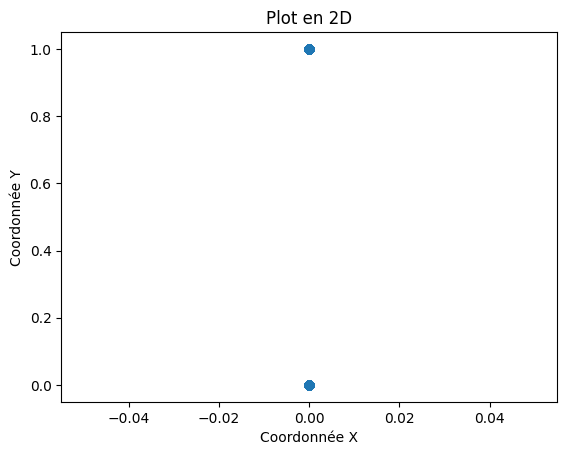

In [15]:
import matplotlib.pyplot as plt

# Données du jeu de données
data = {
    "1": [1, 1, 1, 0, 0, 0],
    "2": [0, 0, 0, 1, 1, 0],
    "3": [0, 0, 1, 1, 0, 1],
    "4": [0, 0, 0, 0, 0, 1],
    "5": [1, 0, 0, 0, 0, 0],
    "7": [0, 0, 0, 0, 1, 0],
}
recipes_binarized

# Extraction des coordonnées X et Y à partir des données
X = [recipes_binarized[key][0] for key in recipes_binarized]
Y = [recipes_binarized[key][1] for key in recipes_binarized]

# Création du plot en 2D
plt.scatter(X, Y)
plt.xlabel('Coordonnée X')
plt.ylabel('Coordonnée Y')
plt.title('Plot en 2D')
plt.show()

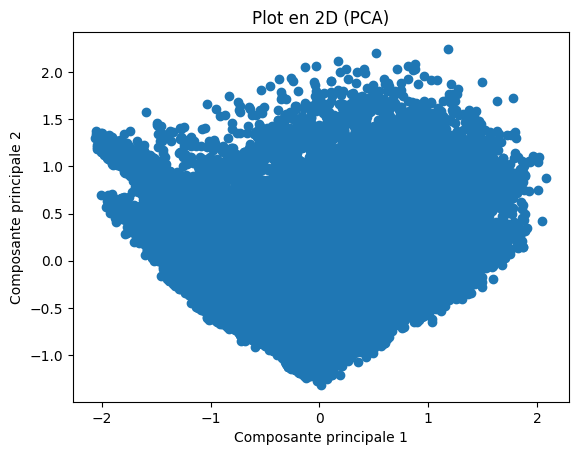

In [18]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA



# Conversion du dictionnaire en une liste de vecteurs
vectors = [recipes_binarized[key] for key in recipes_binarized]

# Réduction de dimensionnalité PCA
"""
a PCA est une technique utilisée pour réduire la dimensionnalité 
d'un ensemble de données en trouvant les directions principales le long 
desquelles les données varient le plus. Ces directions principales sont 
appelées composantes principales.

Lorsque vous effectuez une PCA et projetez les 
données sur un espace de dimension inférieure (dans ce cas, 2 dimensions), 
les coordonnées X et Y correspondent aux valeurs des deux premières composantes principales.
"""
pca = PCA(n_components=2)
projected = pca.fit_transform(vectors)

# Extraction des coordonnées X et Y à partir des données projetées
X = projected[:, 0]
Y = projected[:, 1]

# Création du plot en 2D
plt.scatter(X, Y)
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.title('Répartition des recettes')
plt.show()

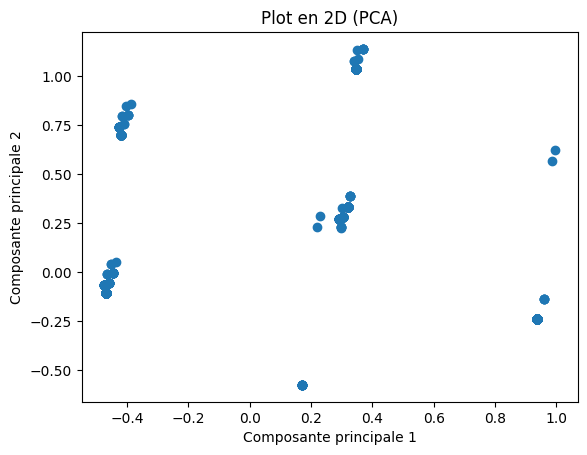

In [33]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


with open("data/binarized_recipes_data_limited_ingredients.json") as f:
    recipes_binarized_limited = json.load(f)

# Conversion du dictionnaire en une liste de vecteurs
vectors = [recipes_binarized_limited[key] for key in recipes_binarized_limited]

# Réduction de dimensionnalité PCA
pca = PCA(n_components=2)
projected = pca.fit_transform(vectors)

# Extraction des coordonnées X et Y à partir des données projetées
X = projected[:, 0]
Y = projected[:, 1]

# Création du plot en 2D
plt.scatter(X, Y)
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.title('Plot en 2D (PCA)')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


with open("data/binarized_recipes_data_limited_ingredients.json") as f:
    recipes_binarized_limited = json.load(f)

# Conversion du dictionnaire en une liste de vecteurs
vectors = [recipes_binarized_limited[key] for key in recipes_binarized_limited]

# Réduction de dimensionnalité PCA
pca = PCA(n_components=2)
projected = pca.fit_transform(vectors)

# Extraction des coordonnées X et Y à partir des données projetées
X = projected[:, 0]
Y = projected[:, 1]

# Création du plot en 2D
plt.scatter(X, Y)
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.title('Plot en 2D (PCA)')
plt.show()

c:\Users\Ulysse\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


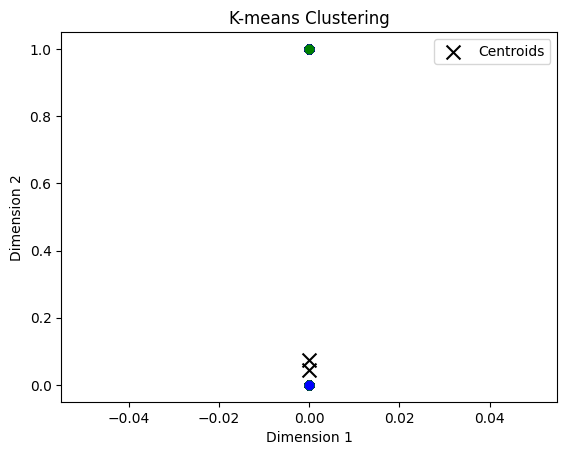

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Données du jeu de données
data = {
    "1": [1, 1, 1, 0, 0, 0],
    "2": [0, 0, 0, 1, 1, 0],
    "3": [0, 0, 1, 1, 0, 1],
    "4": [0, 0, 0, 0, 0, 1],
    "5": [1, 0, 0, 0, 0, 0],
    "7": [0, 0, 0, 0, 1, 0],
}

# Conversion du dictionnaire en une liste de vecteurs
vectors = np.array([recipes_binarized[key] for key in recipes_binarized])

# Application de l'algorithme K-means
k = 2  # Nombre de clusters
kmeans = KMeans(n_clusters=k)
kmeans.fit(vectors)

# Récupération des centres de cluster
centroids = kmeans.cluster_centers_

# Récupération des étiquettes de cluster assignées à chaque point
labels = kmeans.labels_

# Création du plot
colors = ['b', 'g', 'r', 'c', 'm', 'y']  # Couleurs pour chaque cluster
for i, label in enumerate(labels):
    plt.scatter(vectors[i, 0], vectors[i, 1], c=colors[label])

# Affichage des centres de cluster
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='k', s=100, label='Centroids')

plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('K-means Clustering')
plt.legend()
plt.show()


c:\Users\Ulysse\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Ulysse\AppData\Local\Temp\ipykernel_21256\522938580.py:30: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', k)  # Génération d'une palette de couleurs pour les clusters
C:\Users\Ulysse\AppData\Local\Temp\ipykernel_21256\522938580.py:32: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to spec

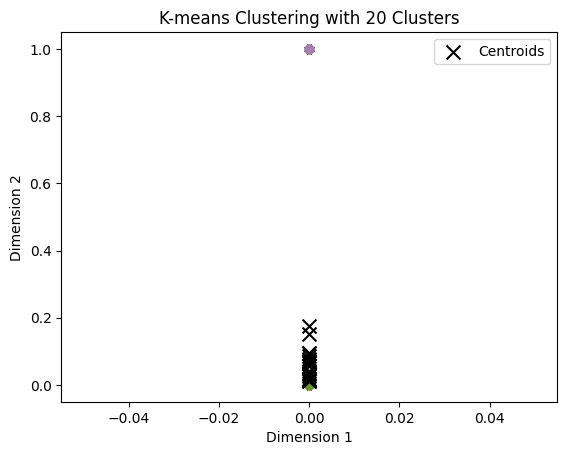

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Conversion du dictionnaire en une liste de vecteurs
vectors = np.array([recipes_binarized[key] for key in recipes_binarized])

# Application de l'algorithme K-means
k = 20  # Nombre de clusters
kmeans = KMeans(n_clusters=k)
kmeans.fit(vectors)

# Récupération des centres de cluster
centroids = kmeans.cluster_centers_

# Récupération des étiquettes de cluster assignées à chaque point
labels = kmeans.labels_

# Création du plot
colors = plt.cm.get_cmap('tab20', k)  # Génération d'une palette de couleurs pour les clusters
for i, label in enumerate(labels):
    plt.scatter(vectors[i, 0], vectors[i, 1], c=colors(label), alpha=0.7)

# Affichage des centres de cluster
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='k', s=100, label='Centroids')

plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('K-means Clustering with 20 Clusters')
plt.legend()
plt.show()

c:\Users\Ulysse\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Ulysse\AppData\Local\Temp\ipykernel_21256\2485604654.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', k)  # Génération d'une palette de couleurs pour les clusters
C:\Users\Ulysse\AppData\Local\Temp\ipykernel_21256\2485604654.py:22: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to sp

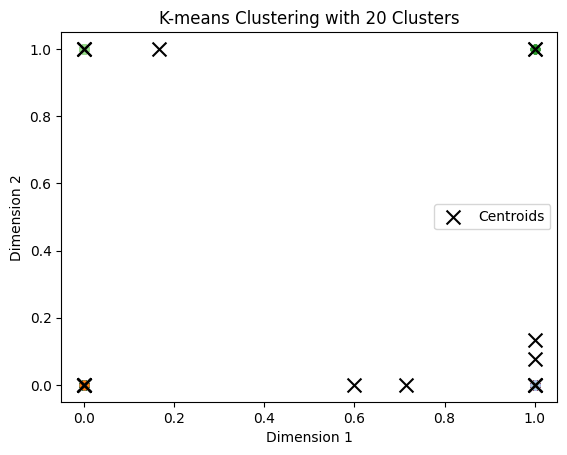

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Conversion du dictionnaire en une liste de vecteurs
vectors = np.array([recipes_binarized_limited[key] for key in recipes_binarized_limited])

# Application de l'algorithme K-means
k = 20  # Nombre de clusters
kmeans = KMeans(n_clusters=k)
kmeans.fit(vectors)

# Récupération des centres de cluster
centroids = kmeans.cluster_centers_

# Récupération des étiquettes de cluster assignées à chaque point
labels = kmeans.labels_

# Création du plot
colors = plt.cm.get_cmap('tab20', k)  # Génération d'une palette de couleurs pour les clusters
for i, label in enumerate(labels):
    plt.scatter(vectors[i, 0], vectors[i, 1], c=colors(label), alpha=0.7)

# Affichage des centres de cluster
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='k', s=100, label='Centroids')

plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('K-means Clustering with 20 Clusters')
plt.legend()
plt.show()